# Math 425 Computation Linear Algebra
## HW6b


### Brent A. Thorne

brentathorne@gmail.com

##### Basis, Othogonality, Projection, Least-squares, Factorization, and SVG.

In [1]:
# environment setup, try to make it clear which library I'm using for what
import numpy as np  # nice arrays and other stuff
import scipy as sci # like numpy but nicer
import sympy as sym # symbollic maths 
from sympy.matrices import Matrix # pretty matrices
from sympy import Eq # pretty equations
from sympy.physics.quantum.dagger import Dagger # we'll want this later...
from math import e, pi, sqrt # Mathy math math
from mpl_toolkits.mplot3d import Axes3D # we like 3d quivers for tutorials
import matplotlib.pyplot as plt # old standby for plotting like a villian
from IPython.display import display, Math, Latex # used to display formatted results in the console
sym.init_printing()  # initialize pretty printing

### 1. Find the singular values of the matrix $\begin{bmatrix} -5&&0\\0&&0\end{bmatrix}$.

In [2]:
A = Matrix([[-5,0],[0,0]])
A, A.rank(), A.T*A, (A.T*A).eigenvects()
#help(Matrix.eigenvects)

⎛⎡-5  0⎤     ⎡25  0⎤  ⎡⎛      ⎡⎡0⎤⎤⎞  ⎛       ⎡⎡1⎤⎤⎞⎤⎞
⎜⎢     ⎥, 1, ⎢     ⎥, ⎢⎜0, 1, ⎢⎢ ⎥⎥⎟, ⎜25, 1, ⎢⎢ ⎥⎥⎟⎥⎟
⎝⎣0   0⎦     ⎣0   0⎦  ⎣⎝      ⎣⎣1⎦⎦⎠  ⎝       ⎣⎣0⎦⎦⎠⎦⎠

In [3]:
print('Show semi-manual process to find SVD:')
V = Matrix([[1,0],[0,1]]) # order our eigenvects

m,n = A.shape
sigma = sym.zeros(m,n) # our matrix for sigma is the same shape as A
sigma_1 = sym.sqrt(25) # made our sigmi
sigma_2 = 0
sigma[0] = sigma_1

u1 = 1/sigma_1*A*V.col(0) # Av_k
u2 = sym.zeros(m,1) # simga_2 is 0 so just cook up a zero vector
U = Matrix([u1.T,u2.T]).T # U is our non-zero Av_k vectors

A, U*sigma*V.T  # validate our result
display(Latex(f'$A=U\\Sigma V^T= \
{sym.latex(U)}{sym.latex(sigma)}{sym.latex(V.T)}=\
{sym.latex(U*sigma*V.T)}$ * Where the non-zero $\Sigma$ are the singular values.'))
display(Latex(f'$A={sym.latex(A)}$, *checks out!'))  # think about this, the sigma are our singular values

Show semi-manual process to find SVD:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 2. Suppose the factorization below is an SVD of a matrix $A$, with the entries in $U$ and $V$ rounded to two decimal places.
#### $A = \begin{bmatrix} -0.86 & -0.11 & -0.50\\~~0.31 & ~~0.68 & -0.67\\~~0.41 & -0.73 & -0.55 \end{bmatrix}  \begin{bmatrix} 12.48 & 0 & 0 & 0\\ 0 & 6.34 & 0 & 0 \\ 0 & 0 & 0 & 0\end{bmatrix} \begin{bmatrix} ~~0.66 & -0.03 & -0.35 & ~~0.66\\ -0.13 & -0.90 & -0.39 & -0.13 \\ ~~0.65 & ~~0.08 & -0.16 & -0.73 \\ -0.34 & ~~0.42 & -0.84 & -0.08\end{bmatrix}$
#### (a) What is the rank of $A$?
#### (b) Use this decomposition of $A$, with no calculations, to write a basis for Col $A$ and a basis for Nul $A$.

(a) The rank is 2 based on the Diagonal matrix in $\Sigma$.

(b) The basis of $A$ is the first two columns of $U$, $\begin{Bmatrix}\begin{bmatrix} -0.86 & -0.11\\~~0.31 & ~~0.68\\~~0.41 & -0.73\end{bmatrix}\end{Bmatrix}$.  

The basis for the Nul $A$ is the last two rows of the $V^T$, $\begin{bmatrix}~~0.65 & ~~0.08 & -0.16 & -0.73 \\ -0.34 & ~~0.42 & -0.84 & -0.08\end{bmatrix}$ or rather more clearly stated, the last two columns of V,


$\begin{Bmatrix}\begin{bmatrix}~~0.65 \\ ~~0.08 \\ -0.16 \\ -0.73\end{bmatrix} \begin{bmatrix}-0.34 \\ ~~0.42 \\ -0.84 \\ -0.08\end{bmatrix}\end{Bmatrix}$.

In [4]:
print('Show the calculation to valid our results: (we are expecting floating point error)')
U = Matrix([[-0.86, -0.11, -0.50],[0.31,0.68,-0.67],[0.41,-0.73,-0.55]])
sigma = Matrix([[12.48,0,0,0],[0,6.34,0,0],[0,0,0,0]])
V = Matrix([[0.66,-0.03,-0.35,0.66],[-0.13,-0.90,-0.39,-0.13],[0.65,0.08,-0.16,-0.73],[-0.34,0.42,-0.84,-0.08]]).T
A = U*sigma*V.T

display(Latex(f'sympy.Matrix.rank() correctly displays the rank as {sym.latex(A.rank())}.'))
display(Latex(f'$A^TA.eigenval()$ shows two very small eigenvalues, \
${sym.latex((A.T*A).eigenvals())}$, which provides further evidence that the rank is indeed $(4-2)=2$.'))

v1 = A.col(0)
v2 = A.col(1) - v1 * A.col(1).dot(v1)/v1.dot(v1)
v1 = v1/v1.norm()
v2 = v2/v2.norm()
v1,v2  

display(Latex('Show $UU^T, VV^T$: *Here we are demostrating U and V are orthonormal basises by rounding.'))
(U*U.T).applyfunc(lambda x: round(x,1)), (V*V.T).applyfunc(lambda x: round(x,1))# A.col(0)/A.col(0).norm(), A.col(1)/A.col().norm()

Show the calculation to valid our results: (we are expecting floating point error)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

⎛                 ⎡1.0   0    0    0 ⎤⎞
⎜⎡1.0   0    0 ⎤  ⎢                  ⎥⎟
⎜⎢             ⎥  ⎢ 0   1.0   0    0 ⎥⎟
⎜⎢ 0   1.0   0 ⎥, ⎢                  ⎥⎟
⎜⎢             ⎥  ⎢ 0    0   1.0   0 ⎥⎟
⎜⎣ 0    0   1.0⎦  ⎢                  ⎥⎟
⎝                 ⎣ 0    0    0   1.0⎦⎠

### 3. Suppose $A$ is square and invertible.  Find the singular value decomposition of $A^{-1}$.

Recall: $A=U\Sigma\ V^T$ 

also recall: $A^{-1}=V\Sigma^{-1}U^T$, where $\Sigma^{-1}= diag( \frac{1}{\sigma_1}, \frac{1}{\sigma_2}, ..., \frac{1}{\sigma_n})$

Working backwards see can see this is correct:

$A^{-1}A = (V\Sigma^{-1}U^T)(U\Sigma V^T)$

$= V\Sigma^{-1}(U^TU)\Sigma V^T)$

$= V(\Sigma^{-1}\Sigma)V^T)$

$= VV^T$

$= I$

To the Mathematician it ought to be obvious how this might be made into a proof, being a pedantic lot maybe we should just do this. Here we go...

Proof:

$A^{-1}=(U\Sigma V^T)^{-1}$

$=(V^T)^{-1}\Sigma^{-1}U^{-1}$, ($U$ and $V$ are orthonormal, thus $(V^T)^{-1} = V$ and $U^{-1} = U^T$)

$=V\Sigma^{-1}U^T$, where $\Sigma^{-1}= diag( \frac{1}{\sigma_1}, \frac{1}{\sigma_2}, ..., \frac{1}{\sigma_n})$. 

∎

'Ah! Never to escape from Being and Number!'

-Charles Baudelaire, The Void

* see also: Moore-Penrose inverse (pseudoinverse) where, $A^†=V_r\Sigma^{-1}U^T_r$
* see also Lay, Ex 7.4.7

### 4. Show that if $A$ is square, then $|detA|$ is the product of the singular values of $A$.

Recall: $A=U\Sigma\ V^T$

Also recall for a square matrix: 

$\Sigma= diag( {\sigma_1}, {\sigma_2}, ..., {\sigma_n})$, where $\sigma_i=\sqrt{\lambda_i}$.  
These $\lambda_i$ are our eigenvalues given by our characteristic polynomial of $A$.

We also know that $U$ and $V^{-1}$ are orthonormal thus are rotations that will not scale $\Sigma$.  Further we can note the determinate of an orthonormal basis is $1$.  This property means U and V are unitary.

Thus by construction using definition of $det$ and the fact that $\Sigma$ is a diagonal matrix,

$|detA| = \prod( {\sigma_1}^2, {\sigma_2}^2, ..., {\sigma_n}^2)$, 

$= \prod( {\lambda_1}, {\lambda_2}, ..., {\lambda_n})$

∎

### 5. Find the $\textit{minimal length}$ least-squares solution of the equation $A\bf x=\bf b$, where
$A = \begin{bmatrix} 1 & 1 & 0\\1 & 1 & 0\\1 & 0 & 1\\ 1 & 0 & 1\end{bmatrix}, ~~{\bf b} = \begin{bmatrix} 1\\3\\8\\2\end{bmatrix}$.

In [40]:
display(Latex('Recall: $A^TAx=A^Tb$'))
display(Latex("Thus, $\\hat{x}=(A^TA)^{-1}A^Tb$, We've been setup! A.T*A is not invertible."))
A = Matrix([[1,1,1,1],[1,1,0,0],[0,0,1,1]]).T # Transposed to make it easiler to type
b = Matrix([1,3,8,2])
A.rank()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [41]:
# Let's do it the long way, we've got some time to kill...
# consider U, show that we could have done it this way, but it's even more work
# Ain't got time for that...
(A*A.T).eigenvects()

⎡⎛      ⎡⎡-1⎤  ⎡0 ⎤⎤⎞  ⎛      ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜      ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎢⎜      ⎢⎢1 ⎥  ⎢0 ⎥⎥⎟  ⎜      ⎢⎢-1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟⎥
⎢⎜0, 2, ⎢⎢  ⎥, ⎢  ⎥⎥⎟, ⎜2, 1, ⎢⎢  ⎥⎥⎟, ⎜6, 1, ⎢⎢ ⎥⎥⎟⎥
⎢⎜      ⎢⎢0 ⎥  ⎢-1⎥⎥⎟  ⎜      ⎢⎢1 ⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0 ⎦  ⎣1 ⎦⎦⎠  ⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

In [34]:
# Consider V
(A.T*A).eigenvects()

⎡⎛      ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡0 ⎤⎤⎞  ⎛      ⎡⎡2⎤⎤⎞⎤
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢1 ⎥⎥⎟, ⎜2, 1, ⎢⎢-1⎥⎥⎟, ⎜6, 1, ⎢⎢1⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

In [42]:
s3, s2, s1 = [sym.sqrt(eig[0]) for eig in (A.T*A).eigenvects()]
v3, v2, v1 = [Matrix(eig[2][0]) for eig in (A.T*A).eigenvects()]
s1, s2, s3, v1, v2, v3 # we don't need the third one of these but we're here anyway

⎛           ⎡2⎤  ⎡0 ⎤  ⎡-1⎤⎞
⎜           ⎢ ⎥  ⎢  ⎥  ⎢  ⎥⎟
⎜√6, √2, 0, ⎢1⎥, ⎢-1⎥, ⎢1 ⎥⎟
⎜           ⎢ ⎥  ⎢  ⎥  ⎢  ⎥⎟
⎝           ⎣1⎦  ⎣1 ⎦  ⎣1 ⎦⎠

In [43]:
v1 = v1/v1.norm()
v2 = v2/v2.norm()

u1 = 1/s1 * A * v1
u2 = 1/s2 * A * v2

Vr = Matrix([v1.T,v2.T]).T
Ur = Matrix([u1.T,u2.T]).T
D = sym.diag(s1,s2)
Ur, D, Vr.T

⎛⎡1/2  -1/2⎤            ⎡√6   √6   √6⎤⎞
⎜⎢         ⎥            ⎢──   ──   ──⎥⎟
⎜⎢1/2  -1/2⎥  ⎡√6  0 ⎤  ⎢3    6    6 ⎥⎟
⎜⎢         ⎥, ⎢      ⎥, ⎢            ⎥⎟
⎜⎢1/2  1/2 ⎥  ⎣0   √2⎦  ⎢    -√2   √2⎥⎟
⎜⎢         ⎥            ⎢0   ────  ──⎥⎟
⎝⎣1/2  1/2 ⎦            ⎣     2    2 ⎦⎠

In [45]:
Vr.T*Vr, Vr*Vr.T

⎛        ⎡2/3  1/3   1/3 ⎤⎞
⎜⎡1  0⎤  ⎢               ⎥⎟
⎜⎢    ⎥, ⎢1/3  2/3   -1/3⎥⎟
⎜⎣0  1⎦  ⎢               ⎥⎟
⎝        ⎣1/3  -1/3  2/3 ⎦⎠

In [36]:
# think about Frobenius norm
f = lambda x: x**2
Af = A.applyfunc(f)
fnorm = sqrt(sum(Af))
Af, fnorm, sqrt(6), (Ur.col(0)* sqrt(sum(Af))*Vr.col(0).T).n(1), (Vr.col(0)*1/fnorm*Ur.col(0).T*b).n(2)

⎛⎡1  1  0⎤                                         ⎡1.0  0.6  0.6⎤       ⎞
⎜⎢       ⎥                                         ⎢             ⎥  ⎡2.0⎤⎟
⎜⎢1  1  0⎥                                         ⎢1.0  0.6  0.6⎥  ⎢   ⎥⎟
⎜⎢       ⎥, 2.8284271247461903, 2.449489742783178, ⎢             ⎥, ⎢1.0⎥⎟
⎜⎢1  0  1⎥                                         ⎢1.0  0.6  0.6⎥  ⎢   ⎥⎟
⎜⎢       ⎥                                         ⎢             ⎥  ⎣1.0⎦⎟
⎝⎣1  0  1⎦                                         ⎣1.0  0.6  0.6⎦       ⎠

In [10]:
Ur*D*Vr.T, A  # validate our decomposing zombie brains

⎛⎡1  1  0⎤  ⎡1  1  0⎤⎞
⎜⎢       ⎥  ⎢       ⎥⎟
⎜⎢1  1  0⎥  ⎢1  1  0⎥⎟
⎜⎢       ⎥, ⎢       ⎥⎟
⎜⎢1  0  1⎥  ⎢1  0  1⎥⎟
⎜⎢       ⎥  ⎢       ⎥⎟
⎝⎣1  0  1⎦  ⎣1  0  1⎦⎠

In [37]:
# find least-squares solution and show it
x_hat_ls = Vr*D.inv()*Ur.T*b
x_hat_ls

⎡7/3 ⎤
⎢    ⎥
⎢-1/3⎥
⎢    ⎥
⎣8/3 ⎦

In [12]:
# show orthogonal projection of b_hat of b onto colA
Ur*Ur.T*b  # A*x_hat_ls

⎡2⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎢5⎥
⎢ ⎥
⎣5⎦

In [13]:
A*x_hat_ls # same as Ur*Ur.T*b above

⎡2⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎢5⎥
⎢ ⎥
⎣5⎦

In [39]:
print('Show our least squares solution as a summary: ') 
x_hat_ls

Show our least squares solution as a summary: 


⎡7/3 ⎤
⎢    ⎥
⎢-1/3⎥
⎢    ⎥
⎣8/3 ⎦

### Appendix 1. BIG PICTURE of linear algebra

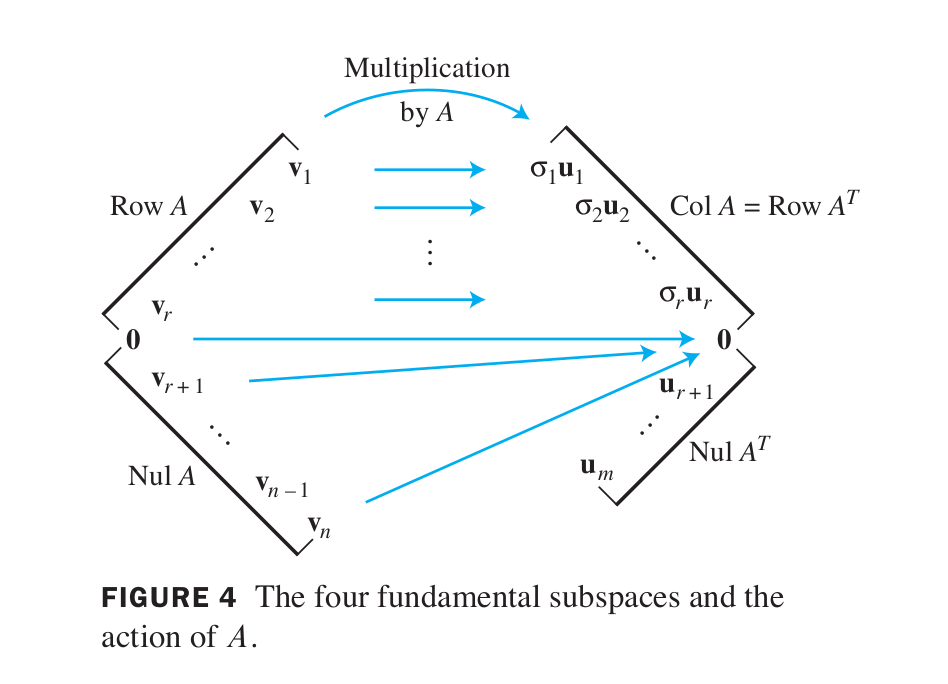
#### 4 subspaces
    - rowspace
    - nullspace
    - columnspace
    - leftnullspace

In [15]:
A = Matrix([[1,2,3],[4,5,6]])
rowA = A.T.col(0), A.T.col(1)
rowA # dim = r

⎛⎡1⎤  ⎡4⎤⎞
⎜⎢ ⎥  ⎢ ⎥⎟
⎜⎢2⎥, ⎢5⎥⎟
⎜⎢ ⎥  ⎢ ⎥⎟
⎝⎣3⎦  ⎣6⎦⎠

In [16]:
A.rref()# x1 - x3 = 0,  x2 + 2*x3 = 0, setting x3 == 1 yeilds, [1,-2,1]
nulA = Matrix([1,-2,1]) # n dims
A.rref(), nulA, A.nullspace(), A*nulA  # dim = n- r

⎛                      ⎡1 ⎤  ⎡⎡1 ⎤⎤     ⎞
⎜⎛⎡1  0  -1⎤        ⎞  ⎢  ⎥  ⎢⎢  ⎥⎥  ⎡0⎤⎟
⎜⎜⎢        ⎥, (0, 1)⎟, ⎢-2⎥, ⎢⎢-2⎥⎥, ⎢ ⎥⎟
⎜⎝⎣0  1  2 ⎦        ⎠  ⎢  ⎥  ⎢⎢  ⎥⎥  ⎣0⎦⎟
⎝                      ⎣1 ⎦  ⎣⎣1 ⎦⎦     ⎠

In [17]:
colA = [A.col(0),A.col(1)]
A.rank(), colA, A.columnspace() # dim = r

⎛   ⎡⎡1⎤  ⎡2⎤⎤  ⎡⎡1⎤  ⎡2⎤⎤⎞
⎜2, ⎢⎢ ⎥, ⎢ ⎥⎥, ⎢⎢ ⎥, ⎢ ⎥⎥⎟
⎝   ⎣⎣4⎦  ⎣5⎦⎦  ⎣⎣4⎦  ⎣5⎦⎦⎠

In [18]:
A.T.rref() # spans R^2, thus nulAT is [0,0], or simply []
nulAT = Matrix([0,0]) # m dims
nulAT, A.T.nullspace() # dim = m-r

⎛⎡0⎤    ⎞
⎜⎢ ⎥, []⎟
⎝⎣0⎦    ⎠

### Appendix 2. Practice Problems

In [19]:
A = Matrix([[1,2,3],[4,5,6],[7,8,9]])
In = sym.eye(3)
In[2,2]=0
In[1,1]=0

A,In,A*In

⎛⎡1  2  3⎤  ⎡1  0  0⎤  ⎡1  0  0⎤⎞
⎜⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎟
⎜⎢4  5  6⎥, ⎢0  0  0⎥, ⎢4  0  0⎥⎟
⎜⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎟
⎝⎣7  8  9⎦  ⎣0  0  0⎦  ⎣7  0  0⎦⎠

#### Lay Ex6.6.2
Suppose we wish to approximate the data by an equation of the form $y_1=\beta_0+\beta_1 x_1+\beta_2 x^{2}$.

Describe the linear model that produces a "least-squares fit" of the data by the above equation.

The coordinate of data points $(x_k, y_k)$ must statisfy the equations of the form $y_k=\beta_0+\beta_1 x_k+\beta_2 x^{2}_k+\epsilon_k$.

In [20]:
y = Matrix(sym.symbols('y1 y2 y_n'))
beta = Matrix(sym.symbols('beta:4'))
epsilon = Matrix(sym.symbols('epsilon1 epsilon2 epsilon_n'))
x0 = sym.ones(1,3)
x1 = sym.symbols('x1, x2, x_n')
x2 = [e**2 for e in x1]
x3 = [e**3 for e in x1]
X = Matrix([x0,x1,x2,x3]).T
y, X, beta, epsilon
display(Latex('$y=X\\beta+\\epsilon$'))  # note use of '\\beta' to escape '\' charactor
display(Latex("Where $y$ is 'observation vector', $X$ is the 'design matrix', \
$\\beta$ is the 'parameter vector' and $\\epsilon$ is the 'residual vector'."))
display(Latex(f'${sym.latex(y)}={sym.latex(X)}{sym.latex(beta)}+{sym.latex(epsilon)}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>